<a href="https://colab.research.google.com/github/Neha03024/Gradient-Boost/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/svm_dataset.csv')
print(df)

     Num_Links  Buy_Now  Capital_Letters  Spam
0            6        1               26     0
1            3        0                1     0
2            7        0               89     1
3            4        1               16     0
4            6        1               32     0
..         ...      ...              ...   ...
195          7        1               81     1
196          4        0               95     1
197          3        1               23     0
198          1        0               22     0
199          5        1               61     1

[200 rows x 4 columns]


In [ ]:
#Basic exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Num_Links        200 non-null    int64
 1   Buy_Now          200 non-null    int64
 2   Capital_Letters  200 non-null    int64
 3   Spam             200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


In [ ]:
print(df.describe())

        Num_Links     Buy_Now  Capital_Letters        Spam
count  200.000000  200.000000       200.000000  200.000000
mean     4.560000    0.535000        49.225000    0.345000
std      2.899731    0.500025        29.713107    0.476561
min      0.000000    0.000000         0.000000    0.000000
25%      2.000000    0.000000        23.000000    0.000000
50%      5.000000    1.000000        49.500000    0.000000
75%      7.000000    1.000000        73.250000    1.000000
max      9.000000    1.000000        99.000000    1.000000


In [ ]:
df.isnull().sum()

,0
Num_Links,0
Buy_Now,0
Capital_Letters,0
Spam,0


In [ ]:
# Separate features and target
X = df.drop('Spam', axis=1)
y = df['Spam']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change kernel: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
#Evaluation
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[24  1]
 [ 1 14]]


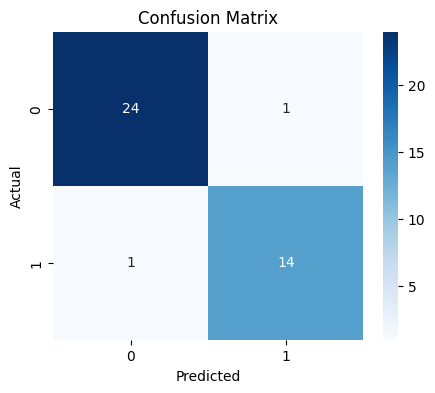

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


Accuracy Score:
0.95
